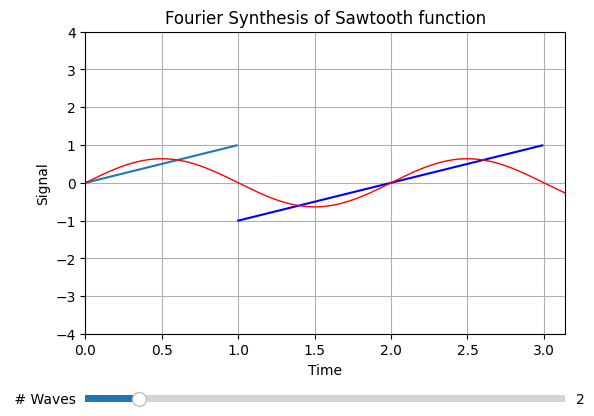

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


M = 4   # initial points for plot Four()
T = 2.  # Function period


numwaves = 2
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.25)  # margins left and botm


t = np.arange(0.0, np.pi, 0.01)     # range with 314 elements
t1 = np.arange(0.0, T/2, 0.01)      # first part 100 elements
t2 = t[100:300]                     # 2nd part of Sawtooth
f1 = t1                             # linear function start at 0
f2 = t2-T                           # linear func start at -1
s = 0


ax.plot(t1, f1)             # 0<=t<= T/2, f=t/(T/2)
ax.plot(t2, f2, color='b')  # in blue, t/2 <=t <= pi,f=(t-T)/(T/2)


def Four(M, T, t):
    """
    Fourier series for a sawtooth wave
    input:
        M: number of sine waves
        T: period
        t:time
    output:
        Fourier series
    """
    sumy = 0
    om = 2.0 * np.pi / T                # omega = 2 pi / T
    fac = 1                             # to alternate signs

    for m in range(1, M):               # M variable selected with slider
        sumy += fac * np.sin(m*om*t)    # summing Fourier Terms
        fac = -fac                      # multiply by -1 previous

    sumy = (2.0/np.pi) * sumy           # common factor
    return sumy


s = Four(M, T, t)                       # initial plot with
l, = plt.plot(t, s, lw=1, color='red')
plt.axis([0, np.pi, -4.0, 4.0])            # [minx, maxx, miny, maxy]

ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Fourier Synthesis of Sawtooth function')
plt.grid(True)


# Slider
axcolor = 'w'  # white backgnd color slider
axnumwaves = plt.axes([0.15, 0.1, 0.75, 0.03], fc=axcolor)      # change 'axisbg' to 'fc'
snumwaves = Slider(axnumwaves, ' # Waves', 1, 10, valinit=T)    # axi inst min max init
# previous: value of the slider (float) assigned to snumwaves


def hzfunc():
    '''
    call Fourier sums and plot
    '''
    hzdict = Four(int(numwaves), T, t)
    ydata = hzdict
    l.set_ydata(ydata)
    plt.draw()


hzfunc()


def update(val):                        # update because slider selects new values
    global numwaves                     # num sin waves summed
    numwaves = int(snumwaves.val)       # make it an integer
    l.set_ydata(Four(numwaves, T, t))   # call Four changing nwaves
    fig.canvas.draw_idle()


snumwaves.on_changed(update)


plt.show()
